# Team Fire
![Image of Firetruck](http://www.massfiretrucks.com/Fairfield_Engine_1.jpg)

**Data**:  For our dataset we selected the Connecticut Fire Department Incidents – 2014 . Available from : https://data.ct.gov/Public-Safety/Connecticut-Fire-Department-Incidents-2014/axrk-twst . The dataset was too large to push to Github. Therefore, we considered which sampling method would be best to reduce the size of our data. We utilized stratified sampling to  select towns within Fairfield County to obtain a sample population that best represents the entire population being studied.  The selected towns were: Fairfield, Greenwich, Norwalk, Stamford, Westport,  Darien, Noroton Heights, Noroton, Rowayton.

**Objectives**:
Some of the questions we hoped to answer during this study were:
- When did the most incidents occur?
- When were the incidents that took the longest to control?
- Which incidents were most costly?
- Which towns per population had the most incidents?
- The performance of each fire department?
- Can we predict how well Fairfield fire department response time compares to requirements?
- Can we build a model to predict response results



#### Lets import the standard imports and our data using the import.py file 

In [1]:
#Standard Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='darkgrid')
import sklearn
import datetime as dt

In [2]:
#Import head of the data set using the import.py file
from Import import data_import
df=data_import('fcounty_clean.csv')
df.head()

,Incident Id,Incident Date,Incident Type Code,Incident Type Code Description,Alarm Date,Arrival Date,Controlled Date,Last Unit Cleared Date,Shift,Alarms,...,Dector Code Description,Mixed Use Code,Mixed Use Code Description,Property Use Code,Propery Use Code Description,Fire Department Name,Fire Department Zip,Incident Location Type,Incident Location Type Description,Incident Location
0,140340,2014-06-18,550,"Public service assistance, other.",2014-06-18 17:41:00,2014-06-18 17:52:00,NaT,2014-06-18 18:32:00,C,0.0,...,NaN,NN,Not mixed use. Incident property consists of a...,419,"1- or 2-family dwelling, detached, manufacture...",FAIRFIELD FIRE DEPT.,6430,1,Street address,"312 WHEELER PARK\nFAIRFIELD, CT 06825"
1,147680,2014-06-06,550,"Public service assistance, other.",2014-06-06 09:13:00,2014-06-06 09:19:00,NaT,2014-06-06 09:38:00,2,0.0,...,NaN,NaN,NaN,961,Highway or divided highway. Includes limited-a...,GREENWICH FIRE DEPARTMENT,6830,1,Street address,"0 RT15N\nGREENWICH, CT 06830"
2,146281,2014-01-08,550,"Public service assistance, other.",2014-01-08 18:58:00,2014-01-08 19:05:00,NaT,2014-01-08 19:19:00,1,0.0,...,NaN,NaN,NaN,419,"1- or 2-family dwelling, detached, manufacture...",GREENWICH FIRE DEPARTMENT,6830,1,Street address,"189 VALLEY RD\nCOS COB, CT 06807\n(41.051311, ..."
3,148052,2014-07-07,550,"Public service assistance, other.",2014-07-07 06:32:00,2014-07-07 06:39:00,NaT,2014-07-07 06:48:00,4,0.0,...,NaN,NaN,NaN,419,"1- or 2-family dwelling, detached, manufacture...",GREENWICH FIRE DEPARTMENT,6830,1,Street address,"W 621 LYON FARM DR\ngreenwich, CT 06830"
4,147977,2014-07-02,550,"Public service assistance, other.",2014-07-02 13:33:00,2014-07-02 13:33:00,NaT,2014-07-02 14:12:00,4,0.0,...,NaN,NaN,NaN,888,Fire station.,GREENWICH FIRE DEPARTMENT,6830,1,Street address,"200 POST RD\nGREENWICH, CT 06830\n(41.089332, ..."


## Creating new columns

In [3]:
#Added two columns, Town Population and Incidents vs. Population

incidents = {'FAIRFIELD FIRE DEPT.':8466,'GREENWICH FIRE DEPARTMENT':3387,'NORWALK FIRE DEPT.':4963,'STAMFORD FIRE DEPT.':10011,'WESTPORT FIRE DEPARTMENT':3252,'TOWN OF DARIEN':529, 'NOROTON HEIGHTS FIRE DEPT.': 413, 'NOROTON FIRE DEPT.':286, 'ROWAYTON FIRE DEPT.':17}
Number_of_Incidents = df['Fire Department Name'].map(incidents)
variable = {'FAIRFIELD FIRE DEPT.':62105,'GREENWICH FIRE DEPARTMENT': 62855,'NORWALK FIRE DEPT.': 89005,'STAMFORD FIRE DEPT.':130824,'WESTPORT FIRE DEPARTMENT':28024,'TOWN OF DARIEN':21887,'NOROTON FIRE DEPT.':21887,'ROWAYTON FIRE DEPT.':89005,'NOROTON HEIGHTS FIRE DEPT.':21887}
df['Town Population'] = df['Fire Department Name'].map(variable)
df['Incidents vs. Population'] = Number_of_Incidents/df['Town Population']


In [4]:
#Create new columns as differences in times
#need to change resulting columns' dtypes to float for future analysis


df['Response Time'] = df['Arrival Date '] - df['Alarm Date ']
df['Response Time'] = df['Response Time']/dt.timedelta(minutes=1)

df['Controlled Time'] = df['Controlled Date'] - df['Arrival Date ']
df['Controlled Time'] = df['Controlled Time']/dt.timedelta(minutes=1)

df['Operation Duration'] = df['Last Unit Cleared Date'] - df['Arrival Date ']
df['Operation Duration'] = df['Operation Duration']/dt.timedelta(minutes=1)



In [5]:
#Changing order of columns

df = df[['Incident Id', 'Incident Date', 'Incident Type Code',
       'Incident Type Code Description', 'Alarm Date ', 'Arrival Date ',
       'Response Time','Controlled Date','Controlled Time', 'Last Unit Cleared Date','Operation Duration', 'Shift ', 'Alarms',
       'Apparatus Suppression', 'Apparatus EMS', 'Apparatus Other ',
       'Personnel Suppression', 'Personnel EMS', 'Personnel Other',
       'Loss Property  ', 'Loss Other', 'Loss Total', 'Value Property',
       'Value Other', 'Fire Department Fatalities', 'Fatal Other',
       'Fire Department Non Fatal', 'Non Fatal Other', 'Detector Code',
       'Dector Code Description', 'Mixed Use Code',
       'Mixed Use Code Description', 'Property Use Code',
       'Propery Use Code Description', 'Fire Department Name','Town Population', 'Incidents vs. Population',
       'Fire Department Zip', 'Incident Location Type',
       'Incident Location Type Description', 'Incident Location']]

In [6]:
#Set index to Incident Date
df=df.set_index('Incident Date')

## Exploratory Data Analysis

We will explore some statistics about all of the towns in the dataset.


### Number of incidents per Month

Text(0.5, 1.0, 'Number of Incidents per Month')

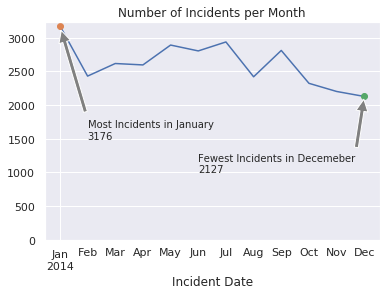

In [7]:
#Number of Incidents per Month


ax = df["Incident Id"].resample("M").count().plot()
ax.set_ylim(0, None)


ax.plot([528], [3176], 'o')
ax.annotate("""Most Incidents in January
3176""", xy=(528, 3176), xytext=(529, 1500),
            arrowprops=dict(facecolor='grey', shrink=0.05))

ax.plot([539], [2127], 'o')
ax.annotate("""Fewest Incidents in Decemeber
2127""", xy=(539, 2127), xytext=(533, 1000),
            arrowprops=dict(facecolor='grey', shrink=0.05))

ax.set_title("Number of Incidents per Month")
#df["Incident Id"].resample("M").count()



### Number of incidents per Day

Text(16100, 40, 'Fewest Incidents November 8')

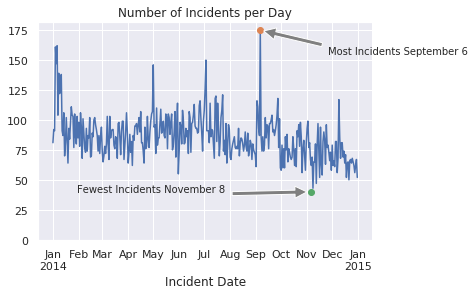

In [8]:
#Number of Incidents per Day
ax = df["Incident Id"].resample("D").count().plot()
ax.set_ylim(0, None)
ax.set_title("Number of Incidents per Day")

ax.plot([16319], [175], 'o')
ax.annotate("""Most Incidents September 6""", xy=(16319, 175), xytext=(16400, 155),
            arrowprops=dict(facecolor='grey', shrink=0.05))

ax.plot([16380], [40], 'o')
ax.annotate("""Fewest Incidents November 8""", xy=(16380, 40), xytext=(16100, 40),
            arrowprops=dict(facecolor='grey', shrink=0.05))

#Included in Charts
#Day with the most fires
#np.argmax(df["Incident Id"].resample("D").count())
#Day with the least fires
#np.argmin(df["Incident Id"].resample("D").count())

### Number of Incidents over time of day

Text(2, 1500, 'Most Incidents             \nbetween 11- 12')

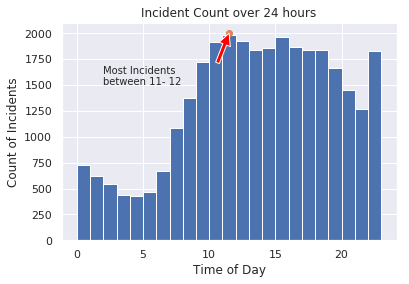

In [9]:
#Created histogram of incident count over 24 hr period
h=df['Alarm Date '].dt.hour.sort_values()

plt.hist(h,bins=23,label="Incident Count over 24 hours",)
plt.title('Incident Count over 24 hours')
plt.xlabel('Time of Day')
plt.ylabel('Count of Incidents')

plt.plot([11.5], [2000], 'o')
plt.annotate("""Most Incidents             
between 11- 12""",xy=(11.5,2000 ), xytext=(2, 1500),
            arrowprops=dict(facecolor='red'))


#### Average Operation Duration per Month

Text(533, 10, 'Lowest Average Operation Duration \nin March')

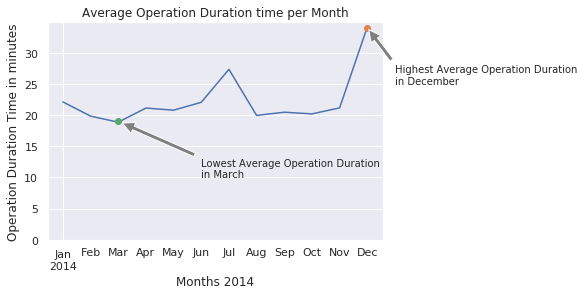

In [10]:
#Average Operating Duration per Month
ax2 = df["Operation Duration"].resample("M").mean().plot()
ax2.set_ylim(0.00, None)
ax2.set_xlabel("Months 2014")
ax2.set_ylabel("Operation Duration Time in minutes")
ax2.set_title("Average Operation Duration time per Month")
df["Operation Duration"].resample("M").mean()

ax2.plot([539], [34], 'o')
ax2.annotate("""Highest Average Operation Duration 
in December""", xy=(539, 34), xytext=(540, 25),
            arrowprops=dict(facecolor='grey', shrink=0.05))

ax2.plot([530], [19], 'o')
ax2.annotate("""Lowest Average Operation Duration 
in March""", xy=(530, 19), xytext=(533, 10),
            arrowprops=dict(facecolor='grey', shrink=0.05))

#Included in graph
#which month had the highest mean Operation Duration
#np.argmax(df["Operation Duration"].resample("M").mean())

#which month had the lowest mean Operation Duration
#np.argmin(df["Operation Duration"].resample("M").mean())


#### Average operation duration per day

Text(16100, 200, 'Summer Forest Fires?')

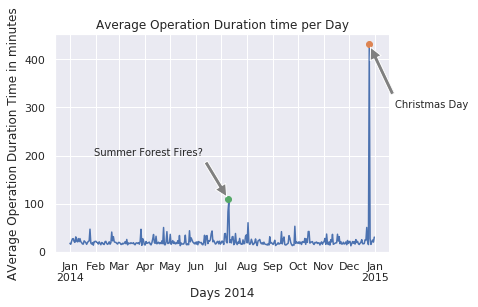

In [11]:
#Average operation duration per day
#After reviewing the data, a incident on christmas day 2014 (incident Id 149488) involving  "Removal of victim(s) from stalled elevator." lasted until 01-13-2015. based on professional skepticism, it was decided to remove this data point.
#df["Operation Duration"]["2014-12-25"].head()

#lets graph the average daily operation duration

df.drop(df.index[1274])
ax4 = df["Operation Duration"].resample("D").mean().plot()

ax4.set_ylim(0.00, None)
ax4.set_xlabel("Days 2014")
ax4.set_ylabel("AVerage Operation Duration Time in minutes")
ax4.set_title("Average Operation Duration time per Day")

ax4.plot([16429], [431], 'o')
ax4.annotate("""Christmas Day """, xy=(16429, 431), xytext=(16460, 300 ),
            arrowprops=dict(facecolor='grey', shrink=0.05))

ax4.plot([16260], [110], 'o')
ax4.annotate("""Summer Forest Fires?""", xy=(16260, 110), xytext=(16100, 200),
            arrowprops=dict(facecolor='grey', shrink=0.05))

#included in graph
#which day had the highest average operaton duration
#np.argmax(df["Operation Duration"].resample("D").mean())
#which day had the highest  operaton duration
#np.argmax(df["Operation Duration"])
#which day had the lower average operation duration
#np.argmin(df["Operation Duration"].resample("D").mean())




#### Correlation between number of incidents and repsonse time per day

In [12]:
#Correlation between number of incidents and response time
(df["Incident Id"].resample("D").count()).corr(df["Response Time"].resample("D").mean())

0.052199113062042495

*0.05 correlation indicates that there a highly insignificant correlation between the number of incidents and response time*

#### Correlation between number of incidents and operation duration time per day

In [13]:
#Correlation between number of incidents and operation duration
(df["Incident Id"].resample("D").count()).corr(df["Operation Duration"].resample("D").mean())

0.001395831352146435

*0.001 correlation indicates there is no correlation betweeen number of incidents and length of the operation duration*

## Create a new DataFrame for Incident Code, Incident Type and amount of Incidents

In [14]:
#Find the most frequent incident types
df['Incident Type Code'].value_counts()[0:5]

321    11059
743     1925
745     1353
611     1316
322     1296
Name: Incident Type Code, dtype: int64

                                                     Type  Total Amount
Incident Code                                                          
321                                              EMS Call         11059
743                             Smoke Detector Activation          1925
745                     Dispatched and Cancelled en Route          1353
611                  Motor Vehicle Accident with Injuries          1316
322            Alarm System Activation due to Malfunction          1296


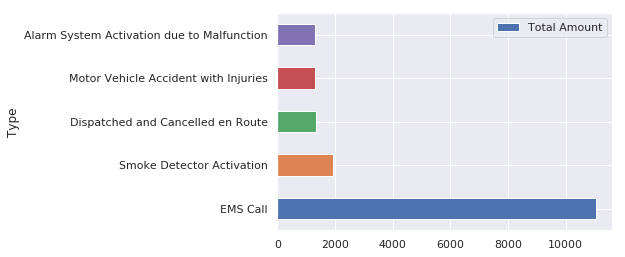

In [15]:
#Created data frame for the five most frequent call types and plotted the results

data = pd.DataFrame([(321,'EMS Call',11059), (743, 'Smoke Detector Activation', 1925),(745,'Dispatched and Cancelled en Route',1353),(611,'Motor Vehicle Accident with Injuries',1316),(322,'Alarm System Activation due to Malfunction',1296)], columns=['Incident Code', 'Type', 'Total Amount'])
indexed_data = data.set_index('Incident Code')
print(indexed_data)
indexed_data.plot(x='Type', y='Total Amount', kind='barh') 


# Greatest Total Loss among Incident Types

In [16]:
#Created data frame for incident types that had the greatest total loss

df1 = df.groupby('Incident Type Code')['Loss Total'].sum()/df['Loss Total'].sum()*100
df1.sort_values(ascending=False).head()

Incident Type Code
111    76.650929
445    10.679830
131     7.479825
134     2.387507
132     1.129802
Name: Loss Total, dtype: float64

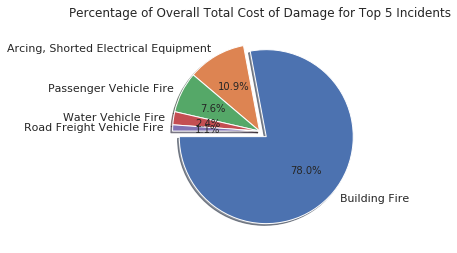

In [17]:
#Pie chart of incident type total loss 

total_percent = [76.67,10.68,7.48,2.39,1.13]
incident_type = ['Building Fire','Arcing, Shorted Electrical Equipment','Passenger Vehicle Fire','Water Vehicle Fire','Road Freight Vehicle Fire']
explode = (0.1,0.0,0.0,0.0,0.0)
plt.pie(total_percent,autopct='%.1f%%', startangle=180, explode=explode, shadow=True, labels=incident_type)  
plt.title('Percentage of Overall Total Cost of Damage for Top 5 Incidents')
plt.show()


## Town Comparisons
### Let's see how each town's fire department compares against each other.

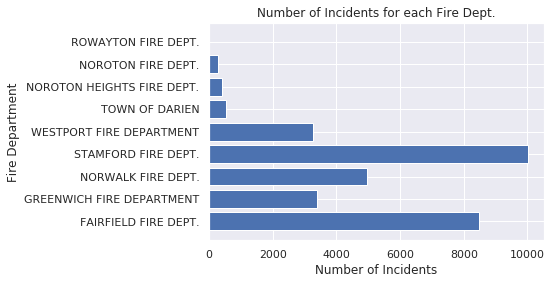

In [18]:
#Bar chart of incidents for each fire department

fd_name = df['Fire Department Name'].drop_duplicates()
Num_Inc = df['Fire Department Name'].map(incidents).drop_duplicates()
plt.barh(fd_name,Num_Inc, orientation='horizontal')
plt.ylabel('Fire Department')
plt.xlabel('Number of Incidents')
plt.title('Number of Incidents for each Fire Dept.')
plt.show()


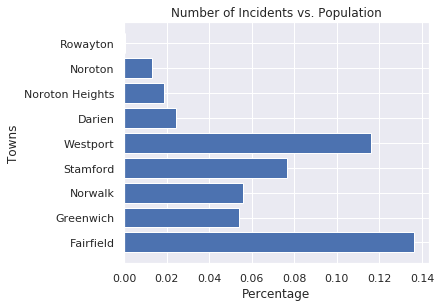

In [19]:
#Graph of incidents vs. population

inc = df['Incidents vs. Population'].drop_duplicates()
fd_name = ['Fairfield', 'Greenwich', 'Norwalk', 'Stamford', 'Westport', 'Darien', 'Noroton Heights', 'Noroton', 'Rowayton']
plt.barh(fd_name,inc, orientation='horizontal')
plt.tight_layout()
plt.xlabel('Percentage')
plt.ylabel('Towns')
plt.title('Number of Incidents vs. Population')
plt.show()


/opt/tljh/user/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


<function matplotlib.pyplot.show(*args, **kw)>

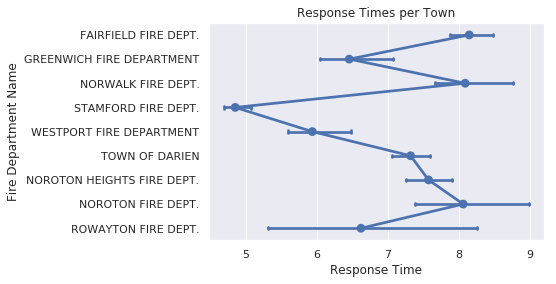

In [20]:
#Mean plot of response times per town

mean_response_time = sns.pointplot(x="Response Time", y="Fire Department Name", data=df, capsize=.1).set_title('Response Times per Town')

plt.show

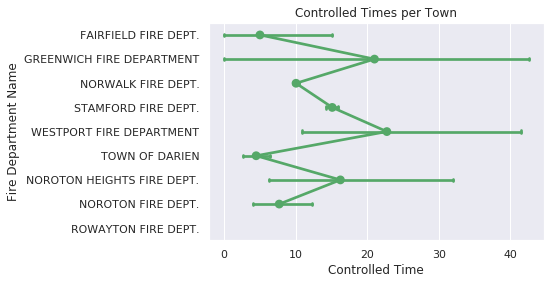

In [21]:
#Mean plot of controlled times per town
mean_control_times = sns.pointplot(x="Controlled Time", y="Fire Department Name", data=df, color ='g',capsize=.1,).set_title('Controlled Times per Town')


plt.show()

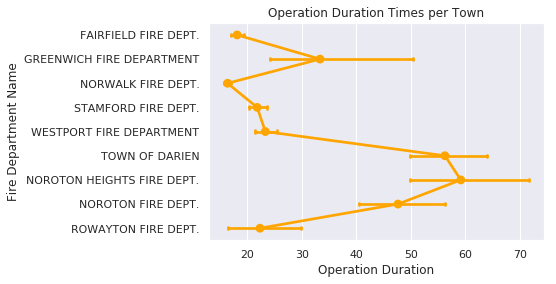

In [22]:
#Mean plot of operation duration times per town
mean_operation_times = sns.pointplot(x="Operation Duration", y="Fire Department Name", color = 'orange',data=df, capsize=.1).set_title('Operation Duration Times per Town')


plt.show()

## Closer look into Fairfield Fire Department

#### Here, we will take a more in-depth look at Fairfield Fire Department and their handling of building fires.

Using information from the National Fire Incident Reporting System, we will look at the Fairfield Fire Deptarment's handling of house fires, which corresponds to incident type codes 111,112,113,114,115, and 116.

Source: https://www.fema.gov/media-library-data/20130726-1904-25045-6123/nfirs__crg_07_2010.pdf

In [23]:
#Look at how long Fairfield firefighters put out fires
#Need to make a dataframe of just Fairfield Incidents. 

ffield = df.loc[df['Fire Department Name']=='FAIRFIELD FIRE DEPT.']

#Dataframe of Faifield fire incidents at homes or buildings, using 'Incident Type Code' 111:116
ffield_fire = ffield.loc[ffield['Incident Type Code'].isin([111,112,113,114,115,116])]


ffield_fire.head(3)

,Incident Id,Incident Type Code,Incident Type Code Description,Alarm Date,Arrival Date,Response Time,Controlled Date,Controlled Time,Last Unit Cleared Date,Operation Duration,...,Mixed Use Code Description,Property Use Code,Propery Use Code Description,Fire Department Name,Town Population,Incidents vs. Population,Fire Department Zip,Incident Location Type,Incident Location Type Description,Incident Location
Incident Date,,,,,,,,,,,,,,,,,,,,,
2014-11-12,143722,114,Chimney or flue fire originating in and confin...,2014-11-12 11:34:00,2014-11-12 11:39:00,5.0,NaT,NaN,2014-11-12 12:03:00,24.0,...,Not mixed use. Incident property consists of a...,419,"1- or 2-family dwelling, detached, manufacture...",FAIRFIELD FIRE DEPT.,62105,0.136318,6430,1,Street address,"1381 BURR ST\nFAIRFIELD, CT 06824\n(41.191236,..."
2014-01-23,137030,113,Cooking fire involving the contents of a cooki...,2014-01-23 19:41:00,2014-01-23 19:46:00,5.0,NaT,NaN,2014-01-23 19:59:00,13.0,...,Not mixed use. Incident property consists of a...,419,"1- or 2-family dwelling, detached, manufacture...",FAIRFIELD FIRE DEPT.,62105,0.136318,6430,1,Street address,"78 BRONSON RD\nFAIRFIELD, CT 06824"
2014-02-15,137556,113,Cooking fire involving the contents of a cooki...,2014-02-15 16:33:00,2014-02-15 16:40:00,7.0,NaT,NaN,2014-02-15 16:53:00,13.0,...,Row of stores. Includes strip malls. Excludes ...,580,"General retail, other.",FAIRFIELD FIRE DEPT.,62105,0.136318,6430,1,Street address,"GRASMERE AV\nFairfield, CT 06824"


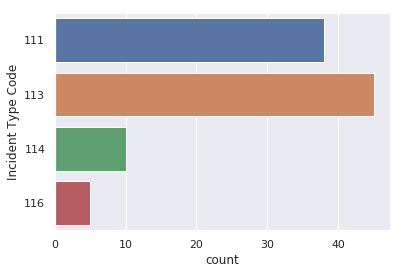

In [24]:
#Let's look at  types of home structure fires that the FAIRFIELD FIRE DEPT. responded to 

sns.countplot(y='Incident Type Code', data=ffield_fire)
plt.show()

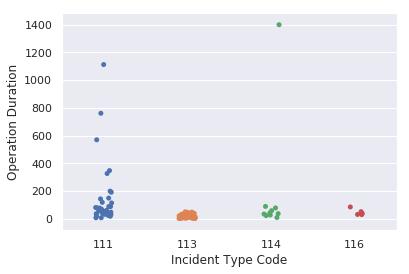

In [25]:
#Let's look at each specific fire type and see how long it took from arrival to last unit cleared date

sns.stripplot(x='Incident Type Code', y='Operation Duration', data = ffield_fire, jitter =True)

plt.show()

In [26]:
#Woah, there are some big outliers, especially in fire code 111. Let's look at those values a little further.
#We'll set the index to incident date to see on what days those happened to research a little more into those incidents.
#Let's return a datframe of the outliers

outliers = ffield_fire[ffield_fire['Operation Duration'] > 400]
outliers.head(3)

,Incident Id,Incident Type Code,Incident Type Code Description,Alarm Date,Arrival Date,Response Time,Controlled Date,Controlled Time,Last Unit Cleared Date,Operation Duration,...,Mixed Use Code Description,Property Use Code,Propery Use Code Description,Fire Department Name,Town Population,Incidents vs. Population,Fire Department Zip,Incident Location Type,Incident Location Type Description,Incident Location
Incident Date,,,,,,,,,,,,,,,,,,,,,
2014-12-22,144699,114,Chimney or flue fire originating in and confin...,2014-12-22 18:34:00,2014-12-22 18:41:00,7.0,NaT,NaN,2014-12-23 18:00:00,1399.0,...,Not mixed use. Incident property consists of a...,419,"1- or 2-family dwelling, detached, manufacture...",FAIRFIELD FIRE DEPT.,62105,0.136318,6430,1,Street address,"300 WINNEPOGE DR\nFAIRFIELD, CT 06825\n(41.196..."
2014-07-09,140877,111,Building fire. Excludes confined fires (113â€“...,2014-07-09 23:41:00,2014-07-09 23:41:00,0.0,NaT,NaN,2014-07-10 18:13:00,1112.0,...,Not mixed use. Incident property consists of a...,419,"1- or 2-family dwelling, detached, manufacture...",FAIRFIELD FIRE DEPT.,62105,0.136318,6430,1,Street address,"464 KNAPPS HWY\nFAIRFIELD, CT 06825\n(41.18090..."
2014-03-27,138435,111,Building fire. Excludes confined fires (113â€“...,2014-03-27 11:38:00,2014-03-27 11:41:00,3.0,NaT,NaN,2014-03-27 21:11:00,570.0,...,Row of stores. Includes strip malls. Excludes ...,549,Specialty shop. Sale of materials commonly use...,FAIRFIELD FIRE DEPT.,62105,0.136318,6430,1,Street address,"1555 POST RD\nFairfield, CT 06824\n(41.14106, ..."


There doesn't seem to be anything particular about these outliers, so let's see a better distribution that is not influenced by these outliers.

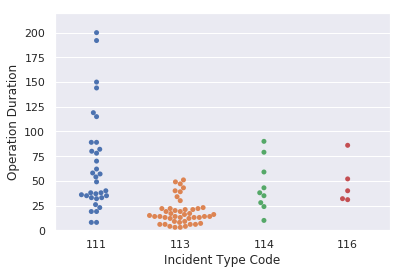

In [27]:
#swarm plot that gives a better picture of the spread of operation times
ffield_fire_no_outliers = ffield_fire[ffield_fire['Operation Duration'] < 250]
fig, ax = plt.subplots()

sns.swarmplot(x='Incident Type Code', y='Operation Duration', data = ffield_fire_no_outliers, ax=ax)
ax.set(ylim = (0,220))

plt.show()

# Further Application
## Building a machine learning program to predict how well Fairfield Fire Dept. response time compares to requirements

We will constuct a very simple machine learning model to see, based on certain features, if we can predict how likely our responders arrive at the scene based on the NFPA 1710 Alarm Handling Time Requirements. These requirements create standards outlining how quickly a fire department should be responding to emergencies. From these guidelines, there are multiple components of our 'Response Time' variable:

- *Alarm transfer time*: the time interval from the receipt of an emergency alarm at the public service answering point (PSAP) until the alarm is first received at the fire department communication center.
- *Alarm answering time*: the time interval that begins when the alarm is received at the fire communication center and ends when the alarm is acknowledged at the fire communication center.
- *Alarm processing time*: the time interval from when the alarm is acknowledged at the fire communication center until response information begins to be transmitted via voice or electronic means to emergency-response facilities
- *Turnout time*: the time interval that begins when the emergency response facilities (ERFs) and emergency response units (ERUs) notification process begins by either an audible alarm or visual annunciation or both and ends at the beginning point of travel time.
- *Travel time*: the time interval that begins when a unit is en route to the emergency incident and ends when the unit arrives at the scene.”

Since we do not know for sure what of the above compenents may be included/excluded for our 'Response Time' variable, we will assume that only the first component, Alarm transfer time, is not taken into account. With the other components in mind, following the NFPA 1710 Alarm Handling Time Requirements, we set a threshold of 7 minutes. This means any response time under 7 minutes is a sucess, but any example above the threshold is a failure.

Information regarding required response times can be found here: http://purvispublicsafety.com/2014/10/18/nfpa-1710-response-times/

In [28]:
#Create a new dataframe that will be used by the machine learning program

new_df = ffield[['Alarm Date ', 'Response Time', 'Apparatus Suppression', 'Apparatus EMS', 'Apparatus Other ']]
new_df.columns

Index(['Alarm Date ', 'Response Time', 'Apparatus Suppression',
       'Apparatus EMS', 'Apparatus Other '],
      dtype='object')

In [29]:
#explode the alarm date column into 4 seperate columns to create a combination of the orginal column 

new_df['Month'] = ffield['Alarm Date '].apply(lambda x: x.strftime('%m'))
new_df['Day of month'] = ffield['Alarm Date '].apply(lambda x: x.strftime('%d'))
new_df['Day of week'] = ffield['Alarm Date '].apply(lambda x: x.strftime('%w'))
new_df['Hour']= ffield['Alarm Date '].apply(lambda x: x.strftime('%H'))


/opt/tljh/user/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/tljh/user/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/opt/tljh/user/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] 

In [30]:
#Transfrom 'Response Time' column into a yes/no column for threshold of 7 minutes: 0 = pass, 1 = fail

threshold = 7
new_df['Pass?'] = np.where(new_df['Response Time']>threshold,1,0)
new_df.drop('Response Time', axis='columns', inplace=True)


/opt/tljh/user/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/opt/tljh/user/lib/python3.6/site-packages/pandas/core/frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [31]:
new_df.head()

,Alarm Date,Apparatus Suppression,Apparatus EMS,Apparatus Other,Month,Day of month,Day of week,Hour,Pass?
Incident Date,,,,,,,,,
2014-06-18,2014-06-18 17:41:00,2,0,0,06,18,3,17,1
2014-01-03,2014-01-03 09:31:00,0,1,0,01,03,5,09,1
2014-07-21,2014-07-21 04:37:00,1,0,0,07,21,1,04,0
2014-02-14,2014-02-14 19:44:00,0,0,1,02,14,5,19,1
2014-02-17,2014-02-17 20:54:00,0,0,1,02,17,1,20,1


In [32]:
# now it's time to create our logistic regression machine learning 
#split our dataset into features and target variable

feature_cols = ['Month', 'Day of month', 'Day of week', 'Hour', 'Apparatus Suppression', 'Apparatus EMS', 'Apparatus Other ']
X = new_df[feature_cols]
y = new_df['Pass?']


In [33]:
#Now we will split our data into training and testing splits

from sklearn.model_selection import train_test_split
X_train, X_test, y_train,y_test = train_test_split(X,y,test_size=.3, random_state=42)

In [34]:
#import our logistic regression class
from sklearn.linear_model import LogisticRegression

#intiate the model using default parameters
logreg = LogisticRegression()

#fit the model with training data
logreg.fit(X_train, y_train)

#make our predictions
y_pred = logreg.predict(X_test)

/opt/tljh/user/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [35]:
#now the model is fitted, we can look at some metrics
#we will visualize a confusion matrix

from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[1491,   73],
       [ 869,  107]])

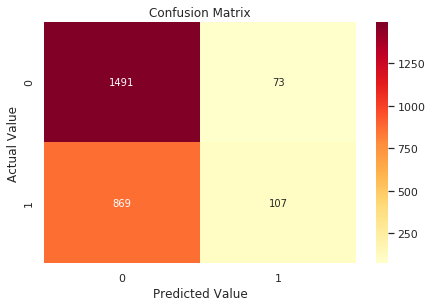

In [36]:
#let's visualize this to make it look nicer

class_names = [0,1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, fmt = 'g', cmap = 'YlOrRd')
ax.xaxis.set_label_position('bottom')
plt.tight_layout()
plt.title('Confusion Matrix')
plt.ylabel('Actual Value')
plt.xlabel('Predicted Value')
plt.show()


In [37]:
#look at evaluation Metics

print('Accuracy:', metrics.accuracy_score(y_test,y_pred))
print('Precision:',metrics.precision_score(y_test,y_pred))
print('Recall:', metrics.recall_score(y_test,y_pred))
print('F1:', metrics.f1_score(y_test,y_pred))

Accuracy: 0.6291338582677165
Precision: 0.5944444444444444
Recall: 0.1096311475409836
F1: 0.18512110726643596


## Analysis

For our case, we want to avoid having our model predicting an example passing when it actually fails, i.e. a false negative. With this in mind, we focus on the recall value. Recall measures the ratio of True Positives over the sum of True Positives and False Negatives. This value is 11%, which means that of all the actual failed examples, our model was only able to correctly predict them 11% of the time (107 / (107 + 869). Our model made so many 0 value predictions that it was able to correctly predict most of the examples of passing, but it also missed most of the examples that failed. From this, we may conclude that the value of response time is more random than previously anticipated, based on our current features. We may need more information, such as the distance from the firehouse to the incident, to add as to this dataset to get a better predicting model. Further analysis is needed to understand in Response Time is too random for prediction or more features are needed.

Information regarding structuring a Losgistic Regression model: https://www.datacamp.com/community/tutorials/understanding-logistic-regression-python

# Conclusion

* There is more incidents in January than any other month.
* Most incidents occur between 11:00 a.m. - 12:00 p.m. 
* The average operation duration increases across the year.
* Fairfield has the most incidents vs. population. 
* EMS calls were the most frequent type.
* Building fires amassed the greatest total loss amount.

These were some of our conclusions based on looking at the 2014 Connecticut Fire department data. We were able to answer most of the questions we hoped to at the beginning of the study. It would be interesting to look at other yearly data for Connecticut to test our results across different years. Also if we had a way of differencing the fire departments in each town and the type of fire department, it would be nice to compare performance across the fire departments.